# Lecture 08: Basic data analysis

[Download on GitHub](https://github.com/NumEconCopenhagen/lectures-2021)

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/lectures-2021/master?urlpath=lab/tree/08/Basic_data_analysis.ipynb)

1. [Combining datasets (merging and concatenating)](#Combining-datasets-(merging-and-concatenating))
2. [Fetching data using an API](#Fetching-data-using-an-API)
3. [Split-apply-combine](#Split-apply-combine)
4. [A few examples of open access APIs](#A-few-examples-of-open-access-APIs)
5. [All built-in functions to aggregate data in Pandas](#All-built-in-functions-to-aggregate-data-in-Pandas)
6. [Summary](#Summary)


**First** Let's start with a [survey](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UNVJVQk5IRzhBUFoxRVpZNkdHOE1GSVhTQiQlQCN0PWcu) on your background in data wrangling. 

You may need to install the DST api-data reader, the pandas_datareader and the matplotlib_venn module. Uncomment the following cells and run to install.  
The ! in front of each command indicates that this is a system command that may as well have been executed in the terminal/command prompt of your computer. 

In [322]:
# The DST API wrapper
#!pip install git+https://github.com/elben10/pydst

In [323]:
# A wrapper for multiple APIs with a pandas interface
#!pip install pandas-datareader

In [324]:
# For Venn diagrams
#!pip install matplotlib-venn

In [325]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib_venn import venn2 # `pip install matplotlib-venn`

<a id="Combining-datasets-(merging-and-concatenating)"></a>

# 1. Combining datasets (merging and concatenating)

When **combining datasets** there are a few crucial concepts: 

1. **Concatenate (append)**: "stack" rows (observations) on top of each other. This works if the datasets have the same columns (variables).
2. **Merge**: the two datasets have different variables, but may or may not have the same observations. 

There are **different kinds of merges** depending on which observations you want to keep:

1. **Outer join (one-to-one)** Keep observations which are in *either* or in *both* datasets.
2. **Inner join (one-to-one)** Keep observations which are in *both* datasets. 
3. **Left join (many-to-one)** Keep observations which are in the *left* dataset or in *both* datasets. 

Keeping observations which are not in both datasets will result in **missing values** for the variables comming from the dataset, where the observation does not exist.

**Read data:**

In [326]:
empl = pd.read_csv('../07/data/RAS200_long.csv') # .. -> means one folder up
inc = pd.read_csv('../07/data/INDKP107_long.csv')
area = pd.read_csv('../07/data/area.csv')

## 1.1 Concatenating datasets

Suppose we have two datasets that have the same variables and we just want to concatenate them.

In [327]:
empl.head(5)

,municipality,year,e
0,Copenhagen,2008,72.5
1,Frederiksberg,2008,75.6
2,Dragør,2008,80.5
3,Tårnby,2008,79.0
4,Albertslund,2008,73.1


In [328]:
N = empl.shape[0]
A = empl.loc[empl.index < N/2,:] # first half of observations
B = empl.loc[empl.index >= N/2,:] # second half of observations

print(f'A has shape {A.shape} ')
print(f'B has shape {B.shape} ')

A has shape (495, 3) 
B has shape (495, 3) 


**Concatenation** is done using the command `pd.concat([df1, df2])`. 

In [329]:
C = pd.concat([A,B])
print(f'C has shape {C.shape} (same as the original empl, {empl.shape})')

C has shape (990, 3) (same as the original empl, (990, 3))


## 1.2 Merging datasets

Two datasets with **different variables**: `empl` and `inc`. 

**Central command:** `pd.merge(empl, inc, on=[municipalitiy, year], how=METHOD)`. 

1. The keyword `on` specifies the **merge key(s)**. They uniquely identify observations in both datasets (for sure in at least one of them).  

2. The keyword `how` specifies the **merge method** (taking values such as `'outer'`, `'inner'`, or `'left'`).

**Look at datasets:**

In [330]:
print(f'Years in empl: {empl.year.unique()}')
print(f'Municipalities in empl = {len(empl.municipality.unique())}')
print(f'Years in inc: {inc.year.unique()}')
print(f'Municipalities in inc = {len(inc.municipality.unique())}')

Years in empl: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Municipalities in empl = 99
Years in inc: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Municipalities in inc = 98


**Find differences:**

In [331]:
diff_y = [y for y in inc.year.unique() if y not in empl.year.unique()] 
print(f'years in inc data, but not in empl data: {diff_y}')

diff_m = [m for m in empl.municipality.unique() if m not in inc.municipality.unique()] 
print(f'municipalities in empl data, but not in inc data: {diff_m}')

years in inc data, but not in empl data: [2004, 2005, 2006, 2007]
municipalities in empl data, but not in inc data: ['Christiansø']


**Conclusion:** `inc` has more years than `empl`, but `empl` has one municipality that is not in `inc`. 

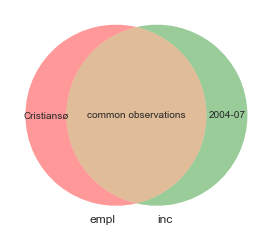

In [332]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('Cristiansø')
v.get_label_by_id('010').set_text('2004-07' )
v.get_label_by_id('110').set_text('common observations')
plt.show()

### Outer join: union

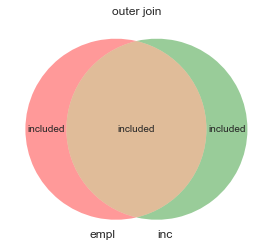

In [333]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('included')
v.get_label_by_id('010').set_text('included')
v.get_label_by_id('110').set_text('included')
plt.title('outer join')
plt.show()

In [334]:
outer = pd.merge(empl,inc,on=['municipality','year'],how='outer')

print(f'Number of municipalities = {len(outer.municipality.unique())}')
print(f'Number of years = {len(outer.year.unique())}')

Number of municipalities = 99
Number of years = 14


We see that the **outer join** includes rows that exist in either dataframe and therefore includes missing values:

In [335]:
I = (outer.year.isin(diff_y)) | (outer.municipality.isin(diff_m))
outer.loc[I, :].head(15)

,municipality,year,e,inc
29,Christiansø,2008,62.9,NaN
128,Christiansø,2009,64.6,NaN
227,Christiansø,2010,67.8,NaN
326,Christiansø,2011,67.7,NaN
425,Christiansø,2012,69.6,NaN
524,Christiansø,2013,69.4,NaN
623,Christiansø,2014,70.0,NaN
722,Christiansø,2015,75.5,NaN
821,Christiansø,2016,77.8,NaN
920,Christiansø,2017,80.9,NaN


### Inner join

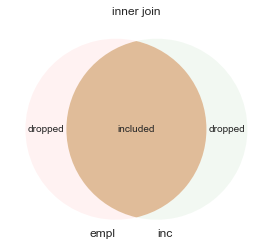

In [336]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('empl', 'inc'))
v.get_label_by_id('100').set_text('dropped'); v.get_patch_by_id('100').set_alpha(0.05)
v.get_label_by_id('010').set_text('dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('included')
plt.title('inner join')
plt.show()

In [337]:
inner = pd.merge(empl,inc,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(inner.municipality.unique())}')
print(f'Number of years          = {len(inner.year.unique())}')

Number of municipalities = 98
Number of years          = 10


We see that the **inner join** does not contain any rows that are not in both datasets. 

In [338]:
I = (inner.year.isin(diff_y)) | (inner.municipality.isin(diff_m))
inner.loc[I, :].head(15)

,municipality,year,e,inc


### Left join

In my work, I most frequently use the **left join**. It is also known as a *many-to-one* join. 

* **Left dataset:** `inner` many observations of a given municipality (one per year),
* **Right dataset:** `area` at most one observation per municipality and new variable (km2). 

In [339]:
inner_with_area = pd.merge(inner, area, on='municipality', how='left')
inner_with_area.head(5)

,municipality,year,e,inc,km2
0,Copenhagen,2008,72.5,259216.0,86.7
1,Frederiksberg,2008,75.6,296988.0,8.7
2,Dragør,2008,80.5,371290.0,18.3
3,Tårnby,2008,79.0,288973.0,66.1
4,Albertslund,2008,73.1,269855.0,23.4


In [340]:
print(f'inner has shape {inner.shape}')
print(f'area has shape {area.shape}')
print(f'merge result has shape {inner_with_area.shape}')

inner has shape (980, 4)
area has shape (99, 2)
merge result has shape (980, 5)


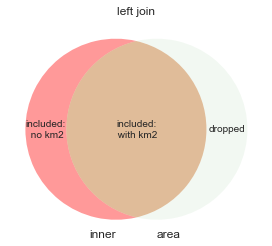

In [341]:
plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('inner', 'area'))
v.get_label_by_id('100').set_text('included:\n no km2'); 
v.get_label_by_id('010').set_text('dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('included:\n with km2')
plt.title('left join')
plt.show()

**Intermezzo:** Finding the non-overlapping observations

In [342]:
not_in_area = [m for m in inner.municipality.unique() if m not in area.municipality.unique()]
not_in_inner = [m for m in area.municipality.unique() if m not in inner.municipality.unique()]

print(f'There are {len(not_in_area)} municipalities in inner that are not in area. They are:')
print(not_in_area)
print('')

print(f'There is {len(not_in_inner)} municipalities in area that are not in inner. They are:')
print(not_in_inner)
print('')

There are 0 municipalities in inner that are not in area. They are:
[]

There is 1 municipalities in area that are not in inner. They are:
['Christiansø']



**Check that km2 is never missing:**

In [343]:
inner_with_area.km2.isnull().sum()

0

### Alternative function for left joins: `df.join()`

To use a left join function `df.join()`, we must first set the index. Technically, we do not need this, but if you ever need to join on more than one variable, `df.join()` requires you to work with indices so we might as well learn it now. 

In [344]:
inner.set_index('municipality', inplace=True)
area.set_index('municipality', inplace=True)
final = inner.join(area)
print(f'final has shape: {final.shape}')
final.head(5)

final has shape: (980, 4)


,year,e,inc,km2
municipality,,,,
Aabenraa,2008,74.6,308611.0,940.7
Aabenraa,2009,71.6,308226.0,940.7
Aabenraa,2010,70.9,350112.0,940.7
Aabenraa,2011,70.2,346564.0,940.7
Aabenraa,2012,69.5,349133.0,940.7


## 1.3 Other programming languages 

**SQL** (including SAS *proc sql*)

SQL is one of the most powerful database languages and many other programming languages embed a version of it. For example, SAS has the `proc SQL`, where you can use SQL syntax. 

SQL is written in statements such as 

* **left join**   `select * from empl left join inc on empl.municipality = inc.municipality and empl.year = inc.year`
* **outer join** `select * from empl full outer join inc on empl.municipality = inc.municipality and empl.year = inc.year`

**STATA**

In Stata, the command `merge` nests many of the commands mentioned above. You specify `merge 1:1`  for a one-to-one merge or `merge m:1`  or `merge 1:m`  for many-to-one or one-to-many merges, and you do not use `merge m:m` (until you are quite advanced). 

<a id="Fetching-data-using-an-API"></a>

# 2. Fetching data using an API

API stands for **Application Programming Interface**. An API is an interface through which we can directly ask for and **receive data from an online source**. We will be using packages for this and will not look at what is going on underneath. 

1. We use `pandas_datareader` to access many common **international online data** sources (install with `pip install pandas-datareader`)
2. For **Statistics Denmark**, Jakob Elben has written the `pydst` package (install with `pip install git+https://github.com/elben10/pydst`)

Fetching data from an API requires an **internet connection** and works directly without saving data to your hard disc (unless you ask Python to do so afterwards). You can use it to automate tasks such as fetching the most recent data, doing some calculations and outputting it in the same manner. This can be useful e.g. for quarterly reports. Remember to save the data on your computer if you really need for later though. The admins of the data may turn off the water..

**Pros:** Automatic; smart; everything is done from Python (so no need to remember steps in between). 

**Cons:** The connection can be slow or drop out, which may lead to errors. If e.g. 100 students simultaneously fetch data (during, say, a lecture), the host server may not be able to service all the requests and may drop out. 

> The raw output data from an API could look like this: https://stats.oecd.org/SDMX-JSON/data/NAAG. It is a log list of non-human-readable gobledygook in the so-called "JSON" format. 

## 2.1 Import data from Denmark Statistics

**Setup:**

In [345]:
Dst = pydst.Dst(lang='en') # setup data loader with the langauge 'english'

Data from DST are organized into: 

1. **Subjects:** indexed by numbers. Use `Dst.get_subjects()` to see the list. 
2. **Tables:** with names like "INDKP107". Use `Dst.get_tables(subjects=['X'])` to see all tables in a subject. 

**Data is extracted**  with `Dst.get_data(table_id = 'NAME', variables = DICT)`. 

**Subjects:** With `Dst.get_subjects()` we can list all subjects.

In [346]:
Dst.get_subjects()

,id,desc,active,hasSubjects
0,02,Population and elections,True,True
1,04,"Labour, income and wealth",True,True
2,06,Prices and consumption,True,True
3,05,Living conditions,True,True
4,14,National accounts and government finances,True,True
5,03,Education and knowledge,True,True
6,11,Business sectors,True,True
7,07,Business sector in general,True,True
8,16,Money and credit market,True,True
9,13,External economy,True,True


**Tables:** With `get_tables()`, we can list all tables under a subject.

In [347]:
tables = Dst.get_tables(subjects=['04'])
print(type(tables))
tables

<class 'pandas.core.frame.DataFrame'>


,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AKU100K,Seasonally adjusted labour force status,"1,000 people",2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, time]"
1,AKU101K,Seasonally adjusted labour force status in per...,per cent,2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, time]"
2,AKU110K,Labour force status,"1,000 people",2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, age, sex, time]"
3,AKU111K,Labour force status in percentage,per cent,2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, age, sex, time]"
4,AKU120K,Labour force status,"1,000 people",2021-02-17 08:00:00,2008Q1,2020Q4,True,"[employment status, region, time]"
...,...,...,...,...,...,...,...,...
239,TJEN01,Accrued civil servant pension for active civil...,-,2020-12-10 08:00:00,2014,2019,True,"[sector, unit, sex, profession, ages groups, t..."
240,TJEN02,Accrued civil servant pension for retired civi...,-,2020-12-10 08:00:00,2014,2019,True,"[sector, unit, sex, time]"
241,PENSOC,Supplementary table for accrued-to-date pensio...,m DKK,2020-12-23 08:00:00,2015,2019,True,"[pension schemes, account, time]"
242,PENS6,Value of pension schemes (except special schem...,-,2020-09-15 08:00:00,2015,2019,True,"[kind of pension, company type, unit, family t..."


**Variable in a dataset:**

In [348]:
tables[tables.id == 'INDKP107']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
198,INDKP107,"Income, persons",-,2020-11-27 08:00:00,2004,2019,True,"[region, unit, sex, level of education, type o..."


In [349]:
indk_vars = Dst.get_variables(table_id='INDKP107')
indk_vars

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,ENHED,unit,False,False,NaN,"[{'id': '101', 'text': 'People with type of in..."
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,UDDNIV,level of education,False,False,NaN,"[{'id': '10', 'text': '10 BASIC SCHOOL 8-10 gr..."
4,INDKOMSTTYPE,type of income,False,False,NaN,"[{'id': '100', 'text': '1 Disposable income (2..."
5,Tid,time,False,True,NaN,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


We want to know the available levels of each conditioning variable that we may subset by. Use a loop to print out those levels. 


**Values of variable in a dataset:**

In [350]:
indk_vars = Dst.get_variables(table_id='INDKP107')

for id in ['ENHED','KOEN','UDDNIV','INDKOMSTTYPE']:
    print(id)
    values = indk_vars.loc[indk_vars.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

ENHED
 id = 101, text = People with type of income (number)
 id = 110, text = Amount of income (DKK 1.000)
 id = 116, text = Average income for all people (DKK)
 id = 121, text = Average income for people with type of income (DKK)
KOEN
 id = MOK, text = Men and women, total
 id = M, text = Men
 id = K, text = Women
UDDNIV
 id = 10, text = 10 BASIC SCHOOL 8-10 grade
 id = 26, text = 20+25 UPPER SECONDARY SCHOOL
 id = 35, text = 35 VOCATIONAL EDUCATION
 id = 40, text = 40 SHORT-CYCLE HIGHER EDUCATION
 id = 61, text = 50+60 MEDIUM-CYCLE HIGHER EDUCATION, BACHLEOR
 id = 65, text = 65 LONG-CYCLE HIGHER EDUCATION
 id = 9, text = Not stated
INDKOMSTTYPE
 id = 100, text = 1 Disposable income (2+30-31-32-35)
 id = 105, text = 2 Pre-tax Income, total (3+7+22+26+29)
 id = 110, text = 3 Primary income (4+5+6)
 id = 115, text = 4 Wages and salaries etc., total
 id = 120, text = 5 Entrepreneurial income, total
 id = 125, text = 6 Received fees subject to labour market contributions
 id = 130, text =

There are quite a few to select from. Need to use a dictionary to specify the desired subset of data. Note: a **\*** indicates that you want all levels. For example, we are subsetting all periods below.  

**Get data:**

In [351]:
variables = {'OMRÅDE':['*'],'ENHED':['110'],'KOEN':['M','K'],'TID':['*'],'UDDNIV':['65'],'INDKOMSTTYPE':['100']}
inc_api = Dst.get_data(table_id = 'INDKP107', variables=variables)
inc_api.sort_values(by=['OMRÅDE', 'TID', 'KOEN'], inplace=True)
inc_api.head(5)

,OMRÅDE,ENHED,KOEN,TID,UDDNIV,INDKOMSTTYPE,INDHOLD
1876,Aabenraa,Amount of income (DKK 1.000),Men,2004,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),223232
1877,Aabenraa,Amount of income (DKK 1.000),Women,2004,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),104081
1602,Aabenraa,Amount of income (DKK 1.000),Men,2005,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),237525
1603,Aabenraa,Amount of income (DKK 1.000),Women,2005,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),109505
1421,Aabenraa,Amount of income (DKK 1.000),Men,2006,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),250321


.. now you have a data set ready for cleaning and renaming.

## 2.2 FRED (Federal Reserve Economic Data)

**GDP data** for the US

In [352]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2017,1,1)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 4383


In [353]:
# Call the FRED api using pandas_datareader 
gdp = pandas_datareader.data.DataReader('GDP', 'fred', start, end)
gdp.head(10)

,GDP
DATE,
2005-01-01,12761.337
2005-04-01,12910.022
2005-07-01,13142.873
2005-10-01,13332.316
2006-01-01,13603.933
2006-04-01,13749.806
2006-07-01,13867.469
2006-10-01,14037.228
2007-01-01,14208.569


**Finding data:**

1. go to https://fred.stlouisfed.org 
2. search for data in main bar, e.g. employment and unemployment
3. click the first links
4. table name is next to header 

We now want to pull down data on aggregate employment (PAYEMS) and unemployment (UNEMPLOY) levels and then plot the development. 

**Pulling the data:**

In [354]:
start = datetime.datetime(1939,1,1)
end = datetime.datetime(2018,12,1)

# We can pull from multiple sources in one go. Just combine them in a list.
empl_us = pandas_datareader.data.DataReader(['PAYEMS', 'UNEMPLOY'], 'fred', start, end)

**Plot:**

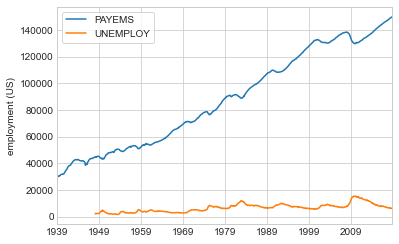

In [355]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
empl_us.plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('employment (US)');

## 2.3 World Bank indicators: `wb`

**Finding data:**

1. go to https://data.worldbank.org/indicator/
2. search for GDP 
3. variable name ("NY.GDP.PCAP.KD") is in the URL

**Pull GDP numbers:**

In [356]:
# Need a different module than in the FRED case
from pandas_datareader import wb

In [357]:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['SE','DK','NO'], start=1990, end=2017)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

,country,year,GDP
82,Sweden,1991,37099.103892
12,Denmark,2005,58792.660440
70,Sweden,2003,47212.708536
35,Norway,2010,87693.790066
47,Norway,1998,78597.915838


In [358]:
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     object 
 1   year     84 non-null     object 
 2   GDP      84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


**Problems:** 
* It turns out that the dataframe has stored the variable *year* as an "object", meaning in practice that it is a string. This must be converted to an int, as we want to use it as a number. 
* *country* is in fact a text variable, so it is acceptable to have it as an object type. But pandas has implemented a string type on its own. It is called 'string', while the text type of object that you normally encounter is of type 'str'. Yes, confusing!!  But you want to get it right, because an object variable can also contain numbers in addition to text. Which is bad. 
* Fortunately, GDP is a float (i.e. a number). 

In [359]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     string 
 1   year     84 non-null     int64  
 2   GDP      84 non-null     float64
dtypes: float64(1), int64(1), string(1)
memory usage: 2.1 KB


**Fetch employment-to-population ratio:**

In [360]:
wb_empl = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['SE','DK','NO'], start=1990, end=2017) # don't need the special datetime here.
wb_empl.rename(columns = {'SL.EMP.TOTL.SP.ZS':'employment_to_pop'}, inplace=True) # Better col name
wb_empl.reset_index(inplace = True)
wb_empl.year = wb_empl.year.astype(int)
wb_empl.sample(3)

,country,year,employment_to_pop
80,Sweden,1993,57.869999
59,Sweden,2014,58.889999
50,Norway,1995,59.139999


**Merge:**

In [361]:
wb = pd.merge(wb_gdp, wb_empl, how = 'outer', on = ['country','year']);
wb.head(5)

,country,year,GDP,employment_to_pop
0,Denmark,2017,63215.998067,57.900002
1,Denmark,2016,61877.976479,57.720001
2,Denmark,2015,60402.129644,57.279999
3,Denmark,2014,59437.947318,56.919998
4,Denmark,2013,58788.084162,56.830002


<a id="Split-apply-combine"></a>

# 3. Split-apply-combine

One of the most useful skills to learn is **the split-apply-combine process**. For example, we may want to compute the average employment rate within a municipality over time and calculate whether the employment rate in each year is above or below the average. We calculate this variable using a split-apply-combine procedure: 

1. **split**: divide the dataset into units (one for each municipality)
2. **apply**: compute the average employment rate for each unit
3. **combine**: merge this new variable back onto the original dataset

## 3.1 Groupby

**Example data:**

In [362]:
empl = empl.sort_values(['municipality','year']) # sort by first municipality then year
empl.head(5)

,municipality,year,e
68,Aabenraa,2008,74.6
167,Aabenraa,2009,71.6
266,Aabenraa,2010,70.9
365,Aabenraa,2011,70.2
464,Aabenraa,2012,69.5


Use **groupby** to calculate **within means**:

In [363]:
empl.groupby(['municipality'])['e'].mean().head(5)

municipality
Aabenraa       71.19
Aalborg        69.46
Aarhus         68.96
Albertslund    68.58
Allerød        81.37
Name: e, dtype: float64

**Custom functions** the apply part can be specified by using the `lambda` notation. 

**Warning:** `lambda` implementations will often be a pretty slow alternative to *vectorized* operations. More on that later. 

An example with average change:

In [364]:
# Define a lambda function to applied down rows of a column in blocks defined by the groupby. 
avg_first_diff = lambda x: x.diff(1).mean() # A pd.Series has a function diff that does the job.

# Apply the lambda and print head of output
empl.groupby('municipality')['e'].apply(avg_first_diff).head(5)

municipality
Aabenraa      -0.188889
Aalborg       -0.366667
Aarhus        -0.300000
Albertslund   -0.322222
Allerød       -0.177778
Name: e, dtype: float64

Or:

In [365]:
# We can also define our lambda with a numpy implementation. 
avg_first_diff = lambda x: np.mean(x[1:]-x[:-1])

# Need the extra lambda function to retrieve values (aka a numpy array) of e for the avg_first_diff.
empl.groupby('municipality')['e'].apply(lambda x: avg_first_diff(x.values)).head(5) 

municipality
Aabenraa      -0.188889
Aalborg       -0.366667
Aarhus        -0.300000
Albertslund   -0.322222
Allerød       -0.177778
Name: e, dtype: float64

**Plot statistics**: Dispersion in employment rate across Danish municipalities over time.

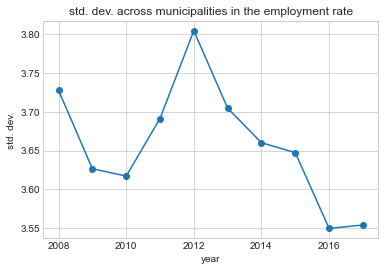

In [366]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

empl.groupby('year')['e'].std().plot(ax=ax,style='-o')

ax.set_ylabel('std. dev.')
ax.set_title('std. dev. across municipalities in the employment rate');

## 3.2 Split-Apply-Combine

**Goal:** Calculate within municipality difference to mean employment rate.

**Start** by splitting, applying and combining **manually:**

**1. Split**:

In [374]:
e_grouped = empl.groupby('municipality')['e']

# The e_grouped object is not ready for inspection
print(e_grouped)

**2. Apply:**

In [372]:
e_mean = e_grouped.mean() # mean employment rate
e_mean.head(10)

municipality
Aabenraa       71.19
Aalborg        69.46
Aarhus         68.96
Albertslund    68.58
Allerød        81.37
Assens         72.03
Ballerup       72.78
Billund        76.53
Bornholm       67.32
Brøndby        68.71
Name: e, dtype: float64

Change name of series:

In [ ]:
e_mean.name = 'e_mean' # necessary for join

**3. Combine:**

In [ ]:
empl_ = empl.set_index('municipality').join(e_mean, how='left')
empl_['e_demean'] = empl_.e - empl_.e_mean
empl_.xs('Copenhagen')

**Plot:**

Text(0, 0.5, 'difference to mean')

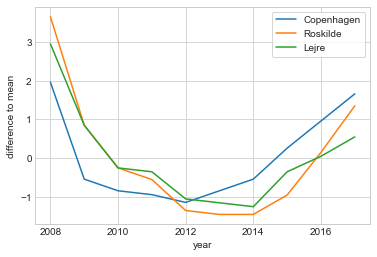

In [47]:
municipalities = ['Copenhagen','Roskilde','Lejre']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for m in municipalities:
    empl_.xs(m).plot(x='year',y='diff',ax=ax,label=m)

ax.legend(frameon=True)
ax.set_ylabel('difference to mean')

### Do the splitting and applying in one fell swoop

### with `agg()`

**Agg:** The same value for all observations in a group.  
We can use **lambdas** or **built-in** functions for the operation. ***Use built-in whenever you can!*** Here we use lambda for exposition. 

In [368]:
empl_ = empl.copy()

# a. split-apply
e_mean = empl_.groupby('municipality')['e'].agg(lambda x: x.mean())

# Alternatively: use built-in function.
# e_mean = empl_.groupby('municipality')['e'].agg('mean')

e_mean.name = 'e_mean'

# b. combine
empl_ = empl_.set_index('municipality').join(e_mean, how='left')
empl_['diff'] = empl_.e - empl_.e_mean
empl_.xs('Copenhagen')

,year,e,e_mean,diff
municipality,,,,
Copenhagen,2008,72.5,70.54,1.96
Copenhagen,2009,70.0,70.54,-0.54
Copenhagen,2010,69.7,70.54,-0.84
Copenhagen,2011,69.6,70.54,-0.94
Copenhagen,2012,69.4,70.54,-1.14
Copenhagen,2013,69.7,70.54,-0.84
Copenhagen,2014,70.0,70.54,-0.54
Copenhagen,2015,70.8,70.54,0.26
Copenhagen,2016,71.5,70.54,0.96


**Note:** Same result!!

**Question** Are there any dangers with the variable name 'diff'?

This is pretty cumbersome though. Creating a new variable and then merging in separate step - we can do better with the tools in Pandas.

### Splitting, applying and combining all together
### with - `transform()` and `apply()` directly

**Transform:** In case you are dealing with multiple variables, transform will work on one variable/column at a time. In the case below, had we selected both *e* and *year* rather than just *e*, x.mean() would only have been applied to observations within one column at a time (as intended, of course, but different from `apply()`)

In [302]:
empl_ = empl.copy()
empl_['e_demean'] = empl_.groupby('municipality')['e'].transform(lambda x: x - x.mean())
empl_.set_index('municipality').xs('Copenhagen')

,year,e,e_demean
municipality,,,
Copenhagen,2008,72.5,1.96
Copenhagen,2009,70.0,-0.54
Copenhagen,2010,69.7,-0.84
Copenhagen,2011,69.6,-0.94
Copenhagen,2012,69.4,-1.14
Copenhagen,2013,69.7,-0.84
Copenhagen,2014,70.0,-0.54
Copenhagen,2015,70.8,0.26
Copenhagen,2016,71.5,0.96


## 3.3 Optimizing performance

It is quite important for your own and other's productivity to implement effecient procedures when dealing with large datasets. The **apply** method (as well as the transform) essentially **loops over** the rows of a column when applying a **lambda** function. This may be much **slower** than needed if you for example end up calculating averages over the whole column or group many, many times (one per row) as in the case below. Using pandas functions **without lambdas** gets it right. Important to avoid such behavior with large data sets. 

In [319]:
import time
N = 300

# a. Check performance with lambda function. Sooo slooow.. 
demean = lambda x: x - x.mean()
tic = time.perf_counter()
for i in range(N):
    d1 = empl.groupby('municipality')['e'].apply(demean)
toc = time.perf_counter()
print(f'Performance with lambda function {toc-tic: 5.3f}')

# b. Performance when relying on built-in pandas methods. It is not because we're using transform per se. 
# It's much faster, because mean is not calculated for each row in data and we're in Cython. 
tic = time.perf_counter()
for i in range(N):
    d2 = empl.e - empl.groupby('municipality')['e'].transform('mean') # Demean by subtracting grouped mean from e column.    
toc = time.perf_counter()
print(f'Performance with pandas vectorized: {toc-tic: 5.3f}')

print('Check of consistency: ', np.all(d1==d2))

Performance with lambda function  5.867
Performance with pandas vectorized:  0.225
Check of consistency:  True


We can also see that an explicit numpy implementation is faster than relying on pandas methods. The example with first differencing from above.

In [297]:
# a. The pandas series implementation
avg_first_diff = lambda x: x.diff(1).mean()
tic = time.perf_counter()
for i in range(N):
    d1 = empl.groupby('municipality')['e'].apply(avg_first_diff)
toc = time.perf_counter()
print(f'Performance with pandas: {toc-tic: 3.6f}')

# b. The Numpy implementation
avg_first_diff = lambda x: np.mean(x.values[1:]-x.values[:-1])
tic = time.perf_counter()
for i in range(N):
    d2 = empl.groupby('municipality')['e'].apply(avg_first_diff)
toc = time.perf_counter()
print(f'Performance with numpy: {toc-tic: 3.6f}')
print('Is d1 == d2:', np.all(d1==d2))

Performance with pandas:  4.396661
Performance with numpy:  1.097140
Is d1 == d2: True


**Note:** Same result!!

### Need more complex group by stuff? 

Look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

### Additional links
* Do you have **missing values** in data? Check [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
* About strings and the `object`type in pandas, [here](https://towardsdatascience.com/why-we-need-to-use-pandas-new-string-dtype-instead-of-object-for-textual-data-6fd419842e24).
* Comparison of SQL statements and pandas group by [here](https://realpython.com/pandas-groupby/)
* Optimizing pandas routines incl. `apply`, [here](https://realpython.com/fast-flexible-pandas/#pandas-apply). (*less technical*)
* Stackoverflow [musings](https://stackoverflow.com/questions/54432583/when-should-i-not-want-to-use-pandas-apply-in-my-code?noredirect=1&lq=1) on optimal use of apply( ) and it's downsides. See also [this](https://stackoverflow.com/questions/38938318/why-apply-sometimes-isnt-faster-than-for-loop-in-pandas-dataframe). (*both pretty technical*)
* About optimizing pandas with numpy and vectorization, [here](https://devopedia.org/optimizing-pandas).

<a id="A-few-examples-of-open-access-APIs"></a>

# 4. A few examples of open access APIs

As already demonstrated, you can pull data from DST using their API. Just to give a few examples of where else you may find open access to data by API: 
* Check out the [documentation for pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). There is a bunch of economic data banks to access through that. 
* There is an API for [covid-19 data](https://pypi.org/project/covid19-data/) that draws on several sources. 
* The National Museum of Art (DK) gives access to their collection [by an API](https://www.smk.dk/article/smk-api/). 
* NASA has its own API. [Look here](https://api.nasa.gov/) for their documentation and [here](https://pypi.org/project/python-nasa-api/) for a Python wrapper. 

<a id="All-built-in-functions-to-aggregate-data-in-Pandas"></a>

# 5. All built-in functions to aggregate data in Pandas

You can use the functions in `apply()`, `transform()` and `agg()` by writing them out in a string. See above. Will normally be the fastest implementation. 

***Function***	 *Description*


* **count:**	 Number of non-null observations
* **sum:**	 Sum of values
* **mean:**	 Mean of values
* **mad:**	 Mean absolute deviation
* **min:**	 Minimum
* **max:**	 Maximum
* **mode:**	 Mode
* **abs:**	 Absolute Value
* **prod:**	 Product of values
* **std:**	 Unbiased standard deviation
* **var:**	 Unbiased variance
* **sem:**	 Unbiased standard error of the mean
* **skew:**	 Unbiased skewness (3rd moment)
* **kurt:**	 Unbiased kurtosis (4th moment)
* **quantile:**	 Sample quantile (value at %)
* **cumsum:**	 Cumulative sum
* **cumprod:**	 Cumulative product
* **cummax:**	 Cumulative maximum
* **cummin:**	 Cumulative minimum

<a id="Summary"></a>

# 6. Summary

**This lecture:** We have discussed

1. Combining datasets (**merging** and concatenating)
2. Fatching data using an **API** (DST, FRED, World Bank, etc.)
3. **Split-apply-combine** (groupby, agg, transform)

**Your work:** Before solving Problem Set 4 read through this notebook and play around with the code.

**Project 1:** See the details in the projects folder of Lectures2021 or *Project 1: Data analysis* [here](https://numeconcopenhagen.netlify.com/exercises/).<br>
**Deadline:** 11th of April.

**Next lecture:** Algorithms: Searching and sorting algorithms.  
Remember **no lecture** Monday 5th of April! (it's a holiday)